<a href="https://colab.research.google.com/github/jktv-git/taller1-ciencia_datos/blob/master/Taller1_CienciaDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.6 MB/s eta 0:00:00


In [23]:
import re
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Levenshtein import distance, ratio

In [4]:
pd.set_option("display.max_columns", None)

In [6]:
hotel_bookings_df = pd.read_csv("./hotel_bookings_modified.csv")

/tmp/ipython-input-1434652757.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  hotel_bookings_df = pd.read_csv("./hotel_bookings_modified.csv")


In [7]:
hotel_bookings_df.shape

(58895, 33)

In [8]:
hotel_bookings_df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,float64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [9]:
hotel_bookings_df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
10189,Resort Hotel,1,74,2017.0,February,7,18,1,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,498.0,0.0,Transient-Party,40.00,0.0,0.0,Canceled,2017-02-01,NaN
51057,City Hotel,1,99,2016.0,May,20,13,1,2,3,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0.0,Transient,159.30,0.0,0.0,Canceled,2016-02-04,NaN
13098,Resort Hotel,1,211,2017.0,July,31,31,1,4,2,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,170.60,0.0,3.0,Canceled,2017-03-14,NaN
40551,City Hotel,1,115,2015.0,July,31,30,0,3,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,11.0,NaN,0.0,Transient,55.08,0.0,0.0,Canceled,2015-05-05,NaN
17948,Resort Hotel,0,0,2016.0,April,15,6,0,1,1,0.0,0,BB,PRT,Direct,Direct,1,0,6,A,D,0,No Deposit,NaN,NaN,0.0,Transient,50.00,0.0,1.0,Check-Out,2016-04-07,NaN


In [10]:
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58895 entries, 0 to 58894
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           58895 non-null  object 
 1   is_canceled                     58895 non-null  int64  
 2   lead_time                       58895 non-null  int64  
 3   arrival_date_year               58307 non-null  float64
 4   arrival_date_month              58895 non-null  object 
 5   arrival_date_week_number        58895 non-null  int64  
 6   arrival_date_day_of_month       58895 non-null  int64  
 7   stays_in_weekend_nights         58895 non-null  int64  
 8   stays_in_week_nights            58895 non-null  int64  
 9   adults                          58895 non-null  int64  
 10  children                        58891 non-null  float64
 11  babies                          58895 non-null  int64  
 12  meal                            

Limpieza de datos

In [11]:
# Limpieza de Datos, Eliminar los datos que son nulos o faltantes, para el subconjunto de variables descritas,
# teniendo en cuenta que solo afectaria el 1% de la data total.
hotel_bookings_df.dropna(subset=[
    'arrival_date_year',
    'children',
    'country',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'reservation_status',
    'reservation_status_date'
], inplace=True)

Procesamientos de datos con muchos nulos

In [13]:
#Se imputara con "0" muchos valores faltantes y que probablemente significan que la reserva fue directa

# Llenar los valores nulos en 'agent' con 0
hotel_bookings_df['agent'] = hotel_bookings_df['agent'].fillna(0)

# Llenar los valores nulos en 'company' con 0
hotel_bookings_df['company'] = hotel_bookings_df['company'].fillna(0)

In [14]:
# Eliminar la columna 'kids', son muy pocos datos
hotel_bookings_df.drop('kids', axis=1, inplace=True)

In [15]:
hotel_bookings_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000,56685.000000
mean,0.414148,100.513134,2205.866631,27.832337,15.768210,1.062009,2.852906,1.971350,0.113751,0.138273,0.030378,0.069154,0.087695,0.243098,124.626391,3.554062,96.606936,0.095722,0.512622
std,0.492579,101.143410,1839.037221,13.312822,8.783038,1.088743,2.225065,2.908805,0.421289,3.144437,0.171628,1.108462,0.769852,0.696551,122.518000,21.926530,58.713846,0.299148,0.767938
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,17.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,60.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,84.800000,0.000000,0.000000
75%,1.000000,158.000000,2016.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,120.600000,0.000000,1.000000
max,1.000000,737.000000,20016.000000,53.000000,31.000000,16.000000,40.000000,100.000000,10.000000,100.000000,1.000000,26.000000,30.000000,20.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


from matplotlib import pyplot as plt
_df_0['is_canceled'].plot(kind='hist', bins=20, title='is_canceled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['lead_time'].plot(kind='hist', bins=20, title='lead_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['arrival_date_year'].plot(kind='hist', bins=20, title='arrival_date_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['arrival_date_week_number'].plot(kind='hist', bins=20, title='arrival_date_week_number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='is_canceled', y='lead_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='lead_time', y='arrival_date_year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='arrival_date_year', y='arrival_date_week_number', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='arrival_date_week_number', y='arrival_date_day_of_month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['is_canceled']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('is_canceled')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['arrival_date_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('arrival_date_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['arrival_date_week_number']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('arrival_date_week_number')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['arrival_date_day_of_month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('arrival_date_day_of_month')

from matplotlib import pyplot as plt
_df_12['is_canceled'].plot(kind='line', figsize=(8, 4), title='is_canceled')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['lead_time'].plot(kind='line', figsize=(8, 4), title='lead_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['arrival_date_year'].plot(kind='line', figsize=(8, 4), title='arrival_date_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['arrival_date_week_number'].plot(kind='line', figsize=(8, 4), title='arrival_date_week_number')
plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
# Eliminar filas con valores de 'adults', 'children', o 'babies' negativos o cero
# Además, eliminar las filas donde la suma de todos los huéspedes es cero
hotel_bookings_df = hotel_bookings_df[(hotel_bookings_df['adults'] >= 0) & (hotel_bookings_df['children'] >= 0) & (hotel_bookings_df['babies'] >= 0)]
hotel_bookings_df = hotel_bookings_df[hotel_bookings_df['adults'] + hotel_bookings_df['children'] + hotel_bookings_df['babies'] > 0]

In [17]:
# Eliminar filas con valores de 'adr' (tarifa) negativos
hotel_bookings_df = hotel_bookings_df[hotel_bookings_df['adr'] >= 0]

In [18]:
# Reemplazar el valor atípico en 'arrival_date_year'
hotel_bookings_df['arrival_date_year'] = hotel_bookings_df['arrival_date_year'].replace(20016, 2016)

Implementación de la Estrategia

1. Tasa de Cancelación por Tipo de Hotel - se calcula la tasa de cancelación para cada tipo de hotel. Esto nos dirá cuál de los dos tiene el mayor problema.


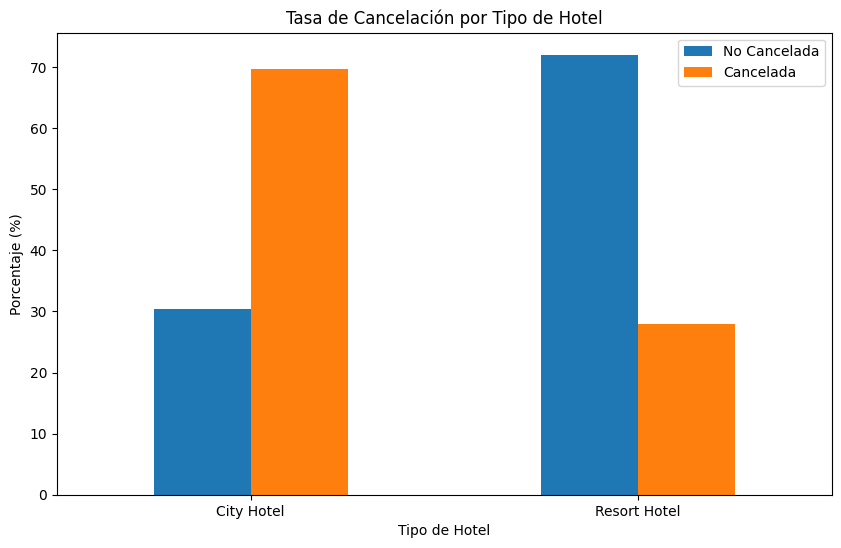

In [22]:
# Contar el número de reservas canceladas y no canceladas para cada tipo de hotel
cancelaciones_por_hotel = hotel_bookings_df.groupby('hotel')['is_canceled'].value_counts(normalize=True).unstack()

# Multiplicar por 100 para obtener el porcentaje
cancelaciones_por_hotel = cancelaciones_por_hotel * 100

# Visualizar con un gráfico de barras
cancelaciones_por_hotel.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Tasa de Cancelación por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Porcentaje (%)')
plt.legend(['No Cancelada', 'Cancelada'])
plt.show()

2. Impacto del Tiempo de Anticipación (lead_time)

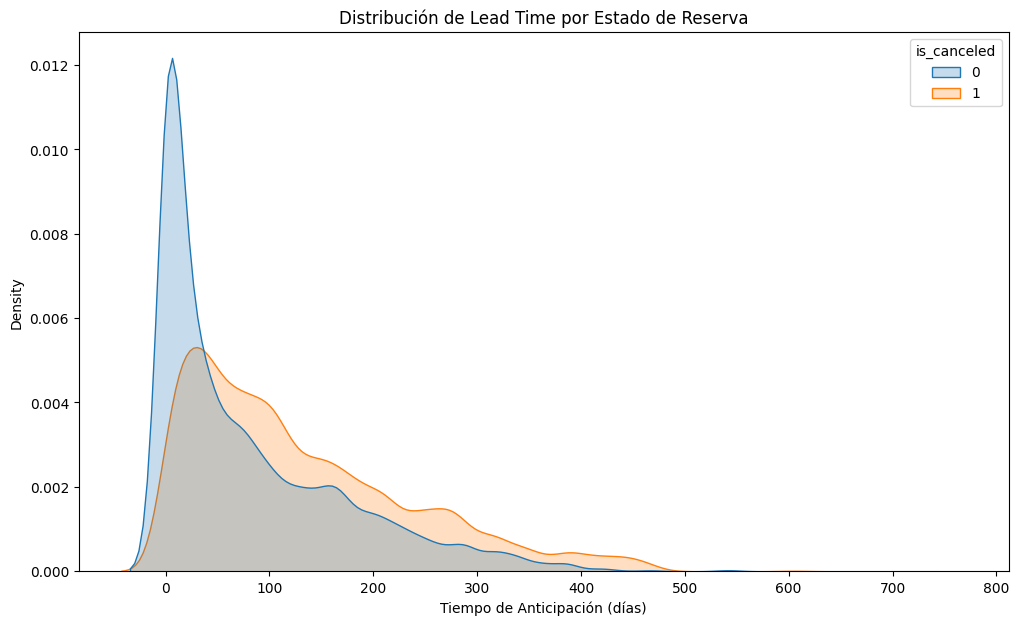

In [24]:
# Crear un gráfico de densidad para comparar la distribución del lead_time
# para reservas canceladas (1) y no canceladas (0)
plt.figure(figsize=(12, 7))
sns.kdeplot(data=hotel_bookings_df, x='lead_time', hue='is_canceled', fill=True, common_norm=False)
plt.title('Distribución de Lead Time por Estado de Reserva')
plt.xlabel('Tiempo de Anticipación (días)')
plt.show()

3. Segmento de Mercado y Cancelaciones:

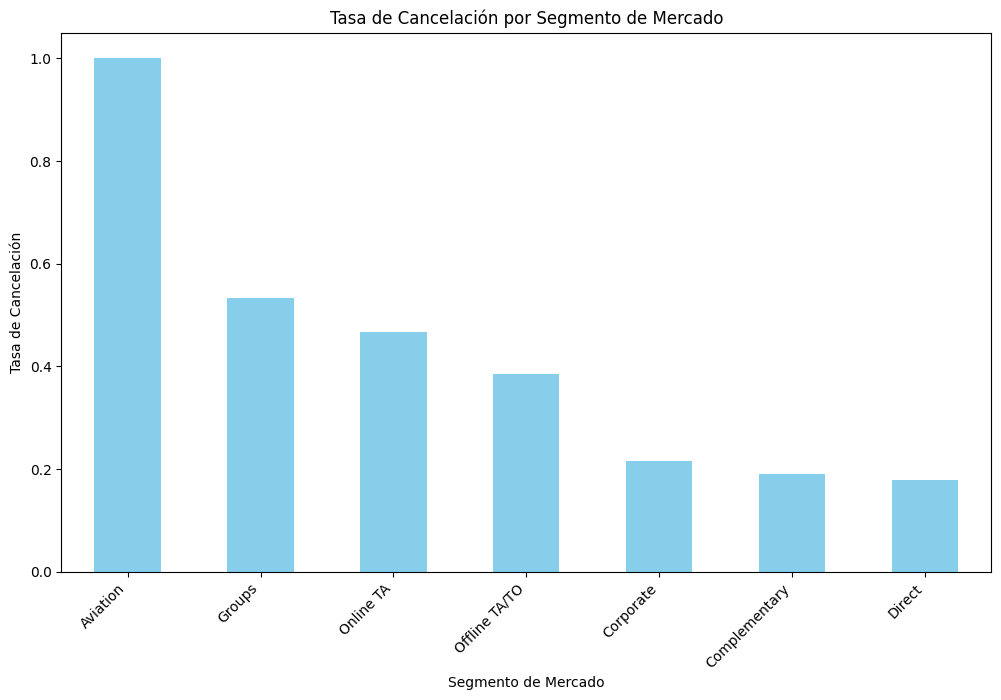

In [25]:
# Calcular la tasa de cancelación por segmento de mercado
cancelaciones_por_segmento = hotel_bookings_df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)

# Visualizar con un gráfico de barras
plt.figure(figsize=(12, 7))
cancelaciones_por_segmento.plot(kind='bar', color='skyblue')
plt.title('Tasa de Cancelación por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Tasa de Cancelación')
plt.xticks(rotation=45, ha='right')
plt.show()